In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ss = pd.read_csv('sample_submission_JPlpRcN.csv')
train = pd.read_csv('train_0OECtn8.csv') # training data
test = pd.read_csv('test_1zqHu22.csv') #testing data

In [3]:
ss.head()

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0


In [4]:
train.head()


,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [5]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [43]:
train.shape,test.shape
tr_r = train.shape[0]

In [44]:
target = train['engagement_score']

In [50]:
def join_df(tr,ts):
    df = pd.concat([tr,ts],axis=0).reset_index(drop=True)
    df = df.drop(['row_id','engagement_score'],axis=1)
    return df

In [46]:
def split_df(data):
    tr,ts = data[:tr_r].reset_index(drop=True),data[tr_r:].reset_index(drop=True)
    tr['engagement_score'] = target
    return tr,ts

# EDA

In [7]:
train.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [9]:
test.isna().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

In [13]:
train.nunique()

row_id              89197
user_id             27734
category_id            47
video_id              175
age                    58
gender                  2
profession              3
followers              17
views                  43
engagement_score      229
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


Text(0.5, 1.0, 'KDE plot')

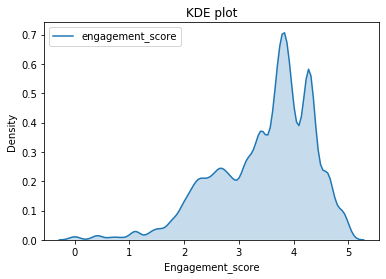

In [13]:
sns.kdeplot(train['engagement_score'],shade=True)
plt.xlabel('Engagement_score')
plt.ylabel('Density')
plt.title('KDE plot')

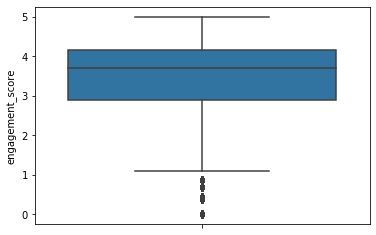

In [14]:
sns.boxplot(train['engagement_score'],orient='vertical')

There are only some outliers in the training data,  which is in the range 0 to 1. It need not be avoided.

# UVA for numerical variables

In [51]:
df_1 = join_df(train,test)

In [52]:
df_1.head()

,user_id,category_id,video_id,age,gender,profession,followers,views
0,19990,37,128,24,Male,Student,180,1000
1,5304,32,132,14,Female,Student,330,714
2,1840,12,24,19,Male,Student,180,138
3,12597,23,112,19,Male,Student,220,613
4,13626,23,112,27,Male,Working Professional,220,613


In [55]:
df_1.shape

(100318, 8)

In [56]:
df_1.nunique()

user_id        27734
category_id       47
video_id         175
age               58
gender             2
profession         3
followers         17
views             43
dtype: int64

It is better to convert category_id into category datatype.

In [58]:
df_1['category_id'] = df_1['category_id'].astype('category')
df_1['category_id'].value_counts()

5     9593
8     7688
25    5841
19    5775
11    4740
4     4499
12    4412
21    4228
34    3979
16    3968
32    3137
13    2913
23    2671
18    2428
31    2369
42    2364
15    2334
9     2045
7     2044
1     1975
3     1845
6     1399
39    1339
10    1321
28    1309
17    1208
26    1156
27    1103
36    1025
43    1019
29     993
35     986
37     962
20     702
30     548
41     545
14     536
38     534
24     524
33     517
40     458
22     366
46     253
45     227
44     226
2      167
47      47
Name: category_id, dtype: int64

Here we group all the categoris which have a frequency greater than 1000 into a new category called others.

In [60]:
cat_stat = df_1['category_id'].value_counts()
cat_stats_less_than_1000 = cat_stat[cat_stat<1000]
df_1['category_id'] = df_1['category_id'].apply(lambda x: 'others' if x in cat_stats_less_than_1000 else x)

Also we categorise age in to four categores.  
0-18 as child  
19-35 as adult  
35-50 as mid_age  
above 55 als senior

In [75]:
df_1['age_category'] = pd.cut(x=df_1['age'],bins=[1,18,35,50,70],labels=['child','adult','mid_age','senior'])

In [76]:
df_1.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,age_category
0,19990,others,128,24,Male,Student,180,1000,adult
1,5304,32,132,14,Female,Student,330,714,child
2,1840,12,24,19,Male,Student,180,138,adult
3,12597,23,112,19,Male,Student,220,613,adult
4,13626,23,112,27,Male,Working Professional,220,613,adult


In [72]:
df_1.dtypes

user_id            int64
category_id       object
video_id           int64
age                int64
gender            object
profession        object
followers          int64
views              int64
age_category    category
dtype: object

Lets look into the numerical variables.

In [64]:
int_cols = ['user_id','video_id','age','followers','views']

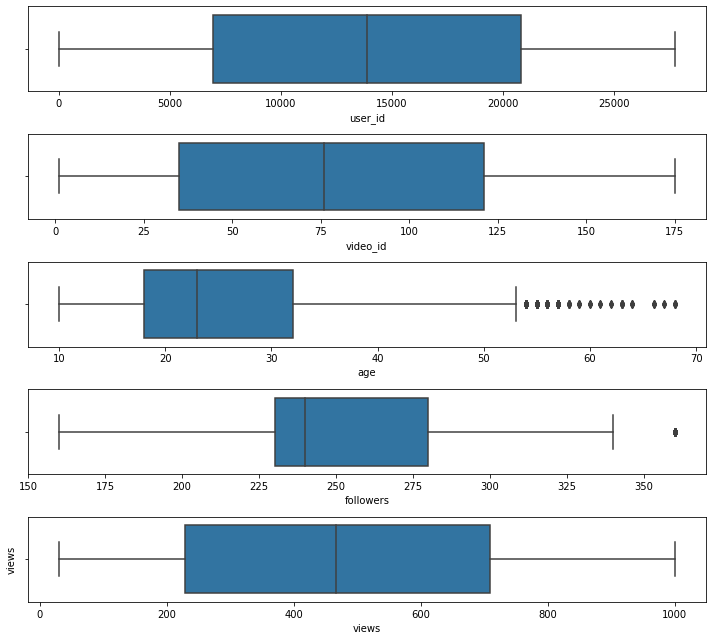

In [77]:
fig, axes = plt.subplots(5,1, figsize=(10, 9))
for i,j in enumerate(int_cols):
    sns.boxplot(ax=axes[i],x=j,data=df_1,orient='horizontal')
    plt.ylabel(j)
    plt.tight_layout()

Here also all the numerical variable are well within the range and outliers are very minimal in each of the columns.

# BVA for numerical variables

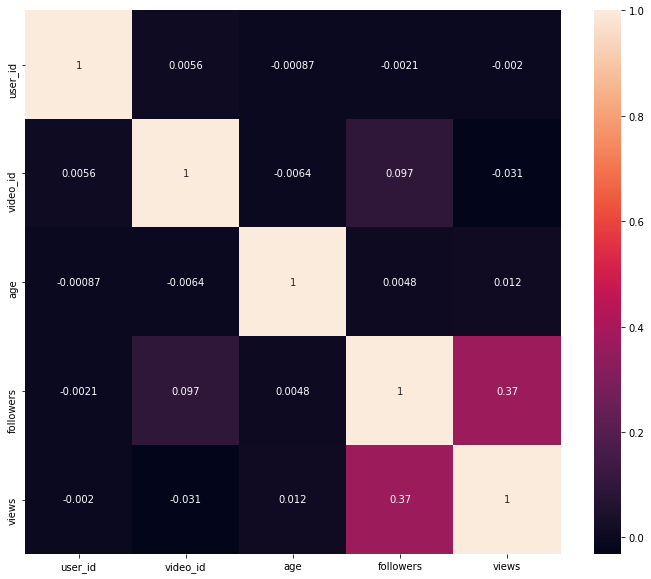

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(df_1[int_cols].corr(),annot=True)

From the correlation heatmap it can be observed that there are no variables which are highly correlated. Only the feature followers and viewa has a small positive correlation of 0.37.

<Figure size 1500x1200 with 0 Axes>

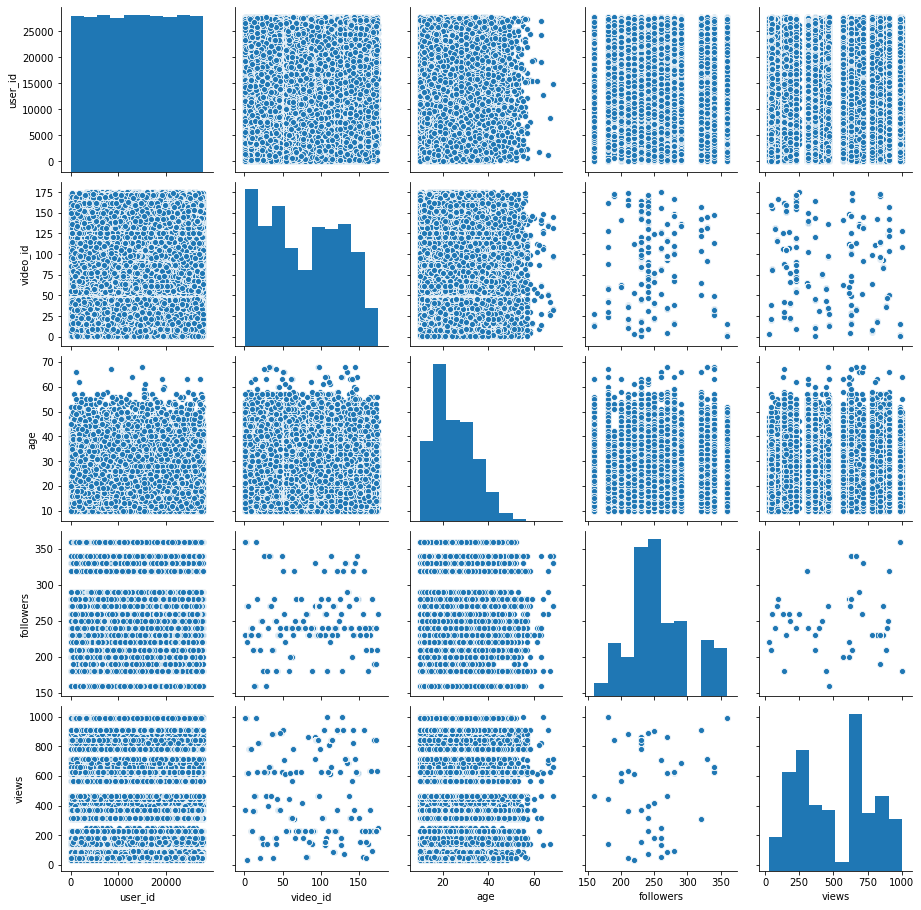

In [79]:
plt.figure(figsize=(10,8),dpi=150)
sns.pairplot(df_1[int_cols])

# UVA for categorical variables

In [80]:
cat_cols = ['gender','profession','category_id','age_category']

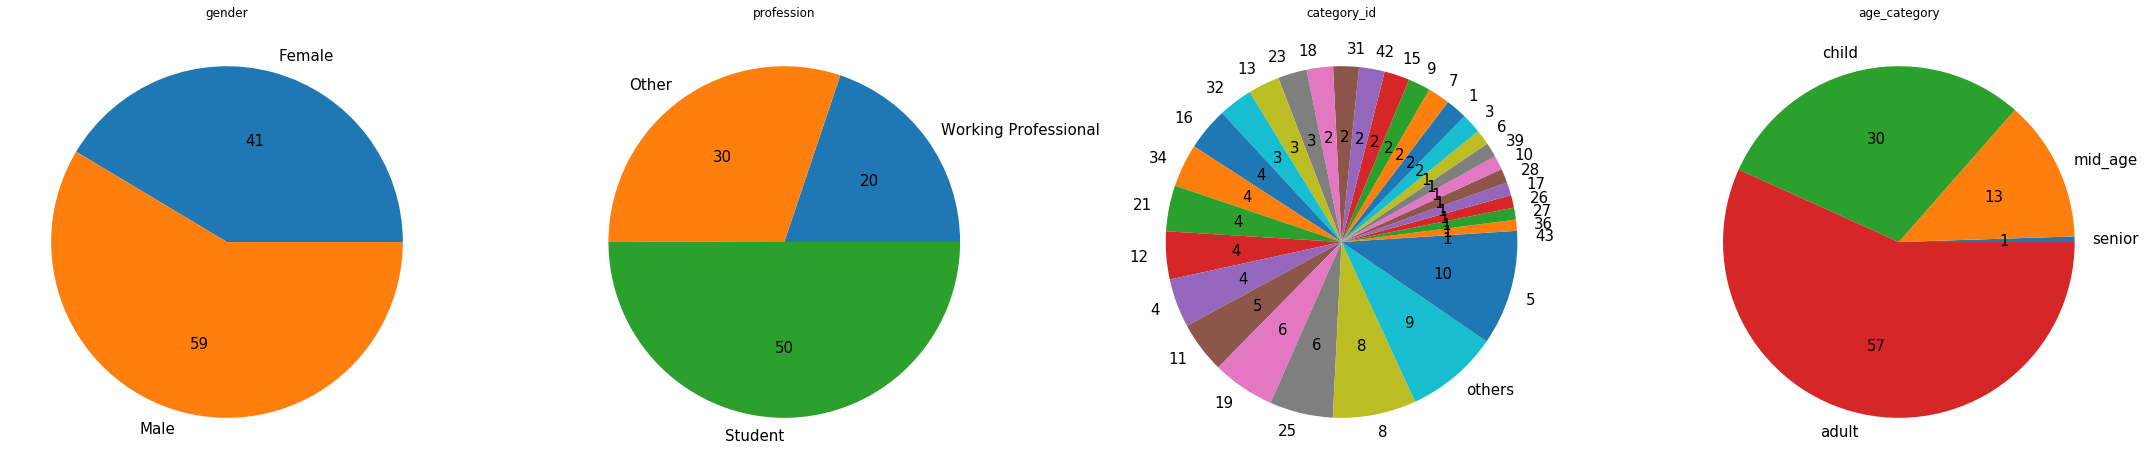

In [91]:
fig,axes =plt.subplots(1,4,figsize=(30,60))
for i,j in enumerate (cat_cols):
    df_1[j].value_counts()[::-1].plot(kind='pie',ax=axes[i],title=j,autopct='%.0f', fontsize=15)
    axes[i].set_ylabel('')
plt.tight_layout()

Inferences
* Almost 60% of the data has gender category males.  
* 50% of the data consist of students.
* 10% of the data has category_id = 5 
* 57% of the data is of people ageing between 20 and 35 years.
* 1% of the data is of people whose age are above 50 years.

In [92]:
def dist(df,col):
    i=1
    plt.figure(figsize=(10,10),dpi=150)
    for key, subdf in df.groupby(col):
        u = df[col].nunique()
        plt.subplot(u,1,i)
        sns.kdeplot(subdf['engagement_score'],shade=True)
        m = np.mean(subdf['engagement_score'])
        s = np.std(subdf['engagement_score'])
        med = np.median(subdf['engagement_score'])
        plt.xlabel('Engagement Score')
        plt.ylabel('Density')
        plt.title(key + '\n  mean:{} std:{} median:{}'.format(round(m,2),round(s,2),round(med,2)))
        plt.tight_layout()
        i=i+1

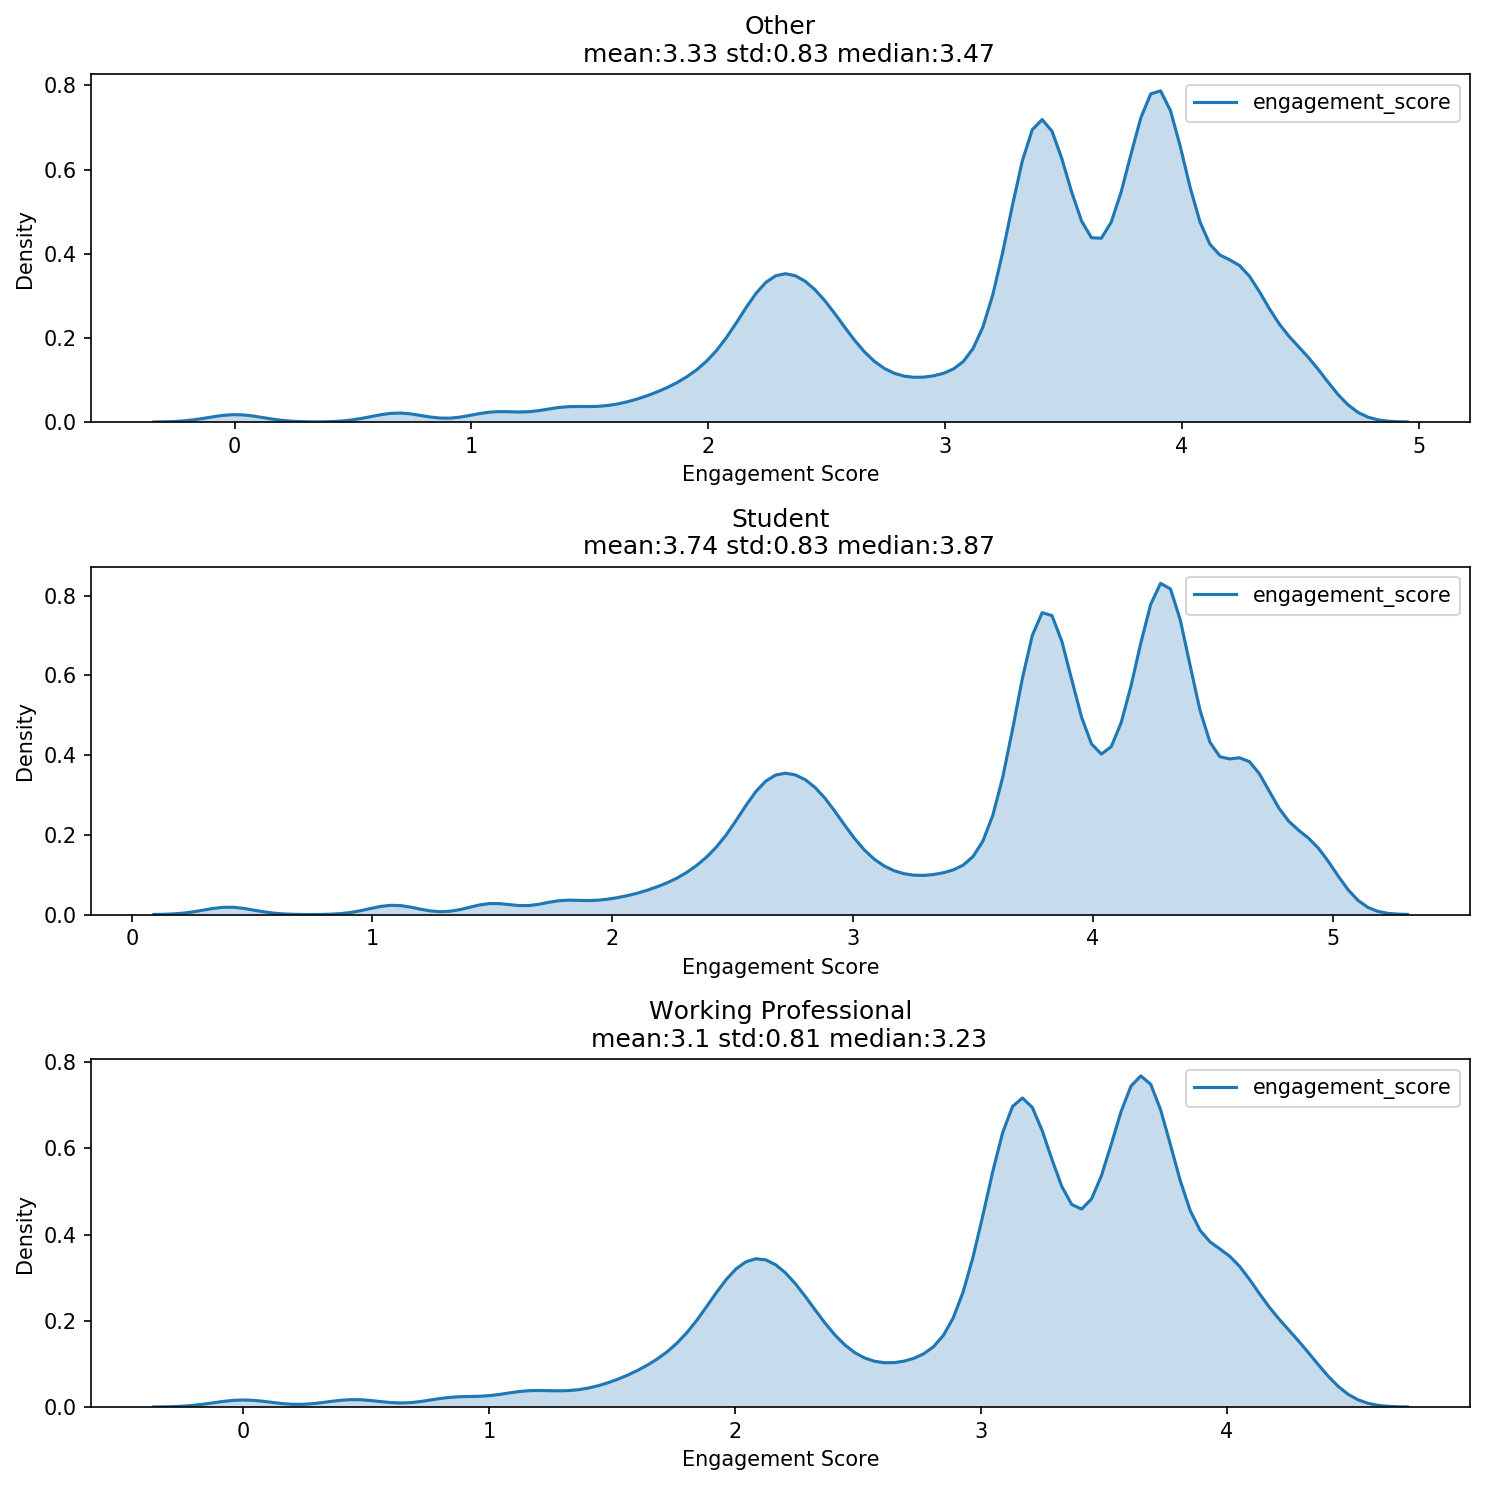

In [93]:
dist(train,'profession')

* From the above curve it can be noted that students tends to have higher rngagement score.

In [94]:
train_1,test_1 = split_df(df_1)

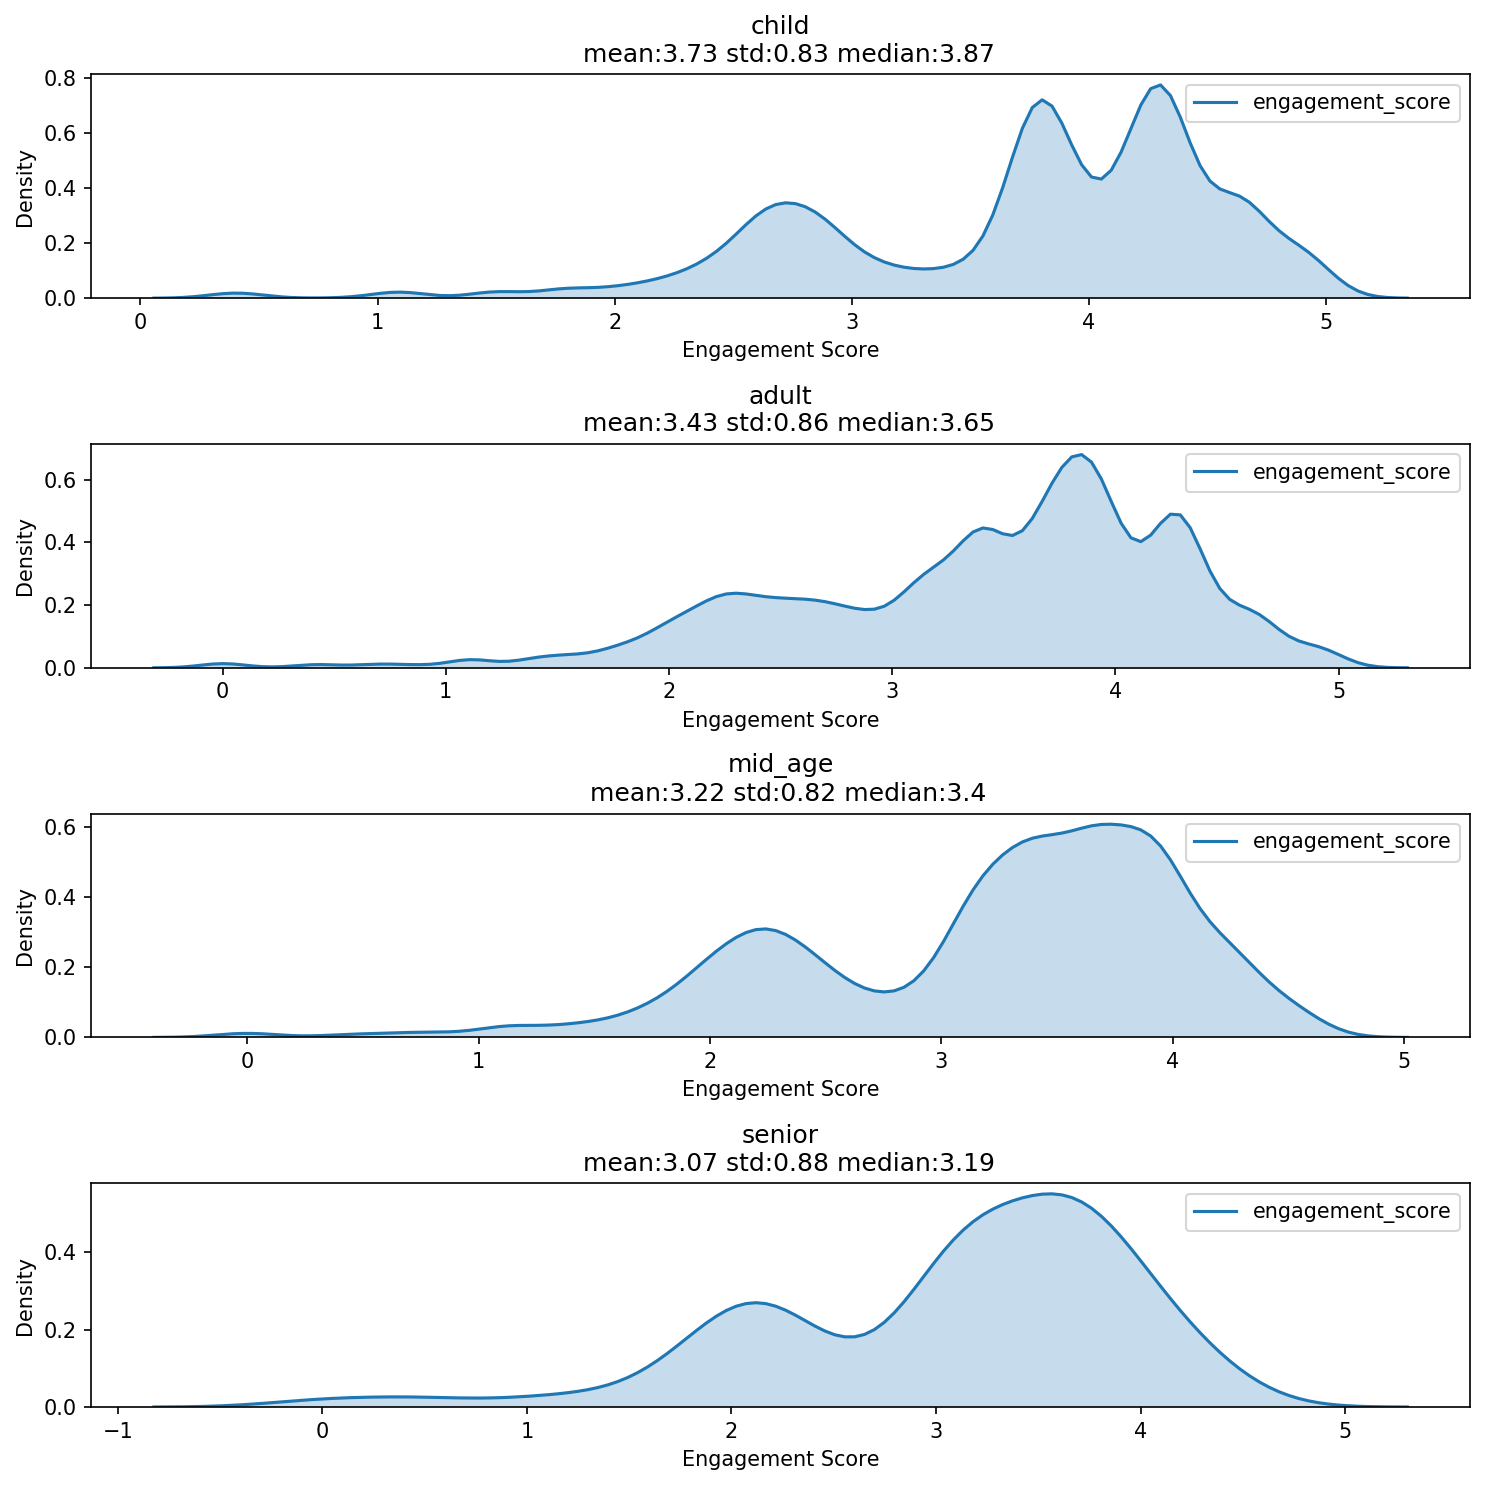

In [95]:
dist(train_1,'age_category')

It can be observed that  
* People betwen 0 to 18 tends to have higher engagement score.
* People above 50 years of age has lower engagement score.

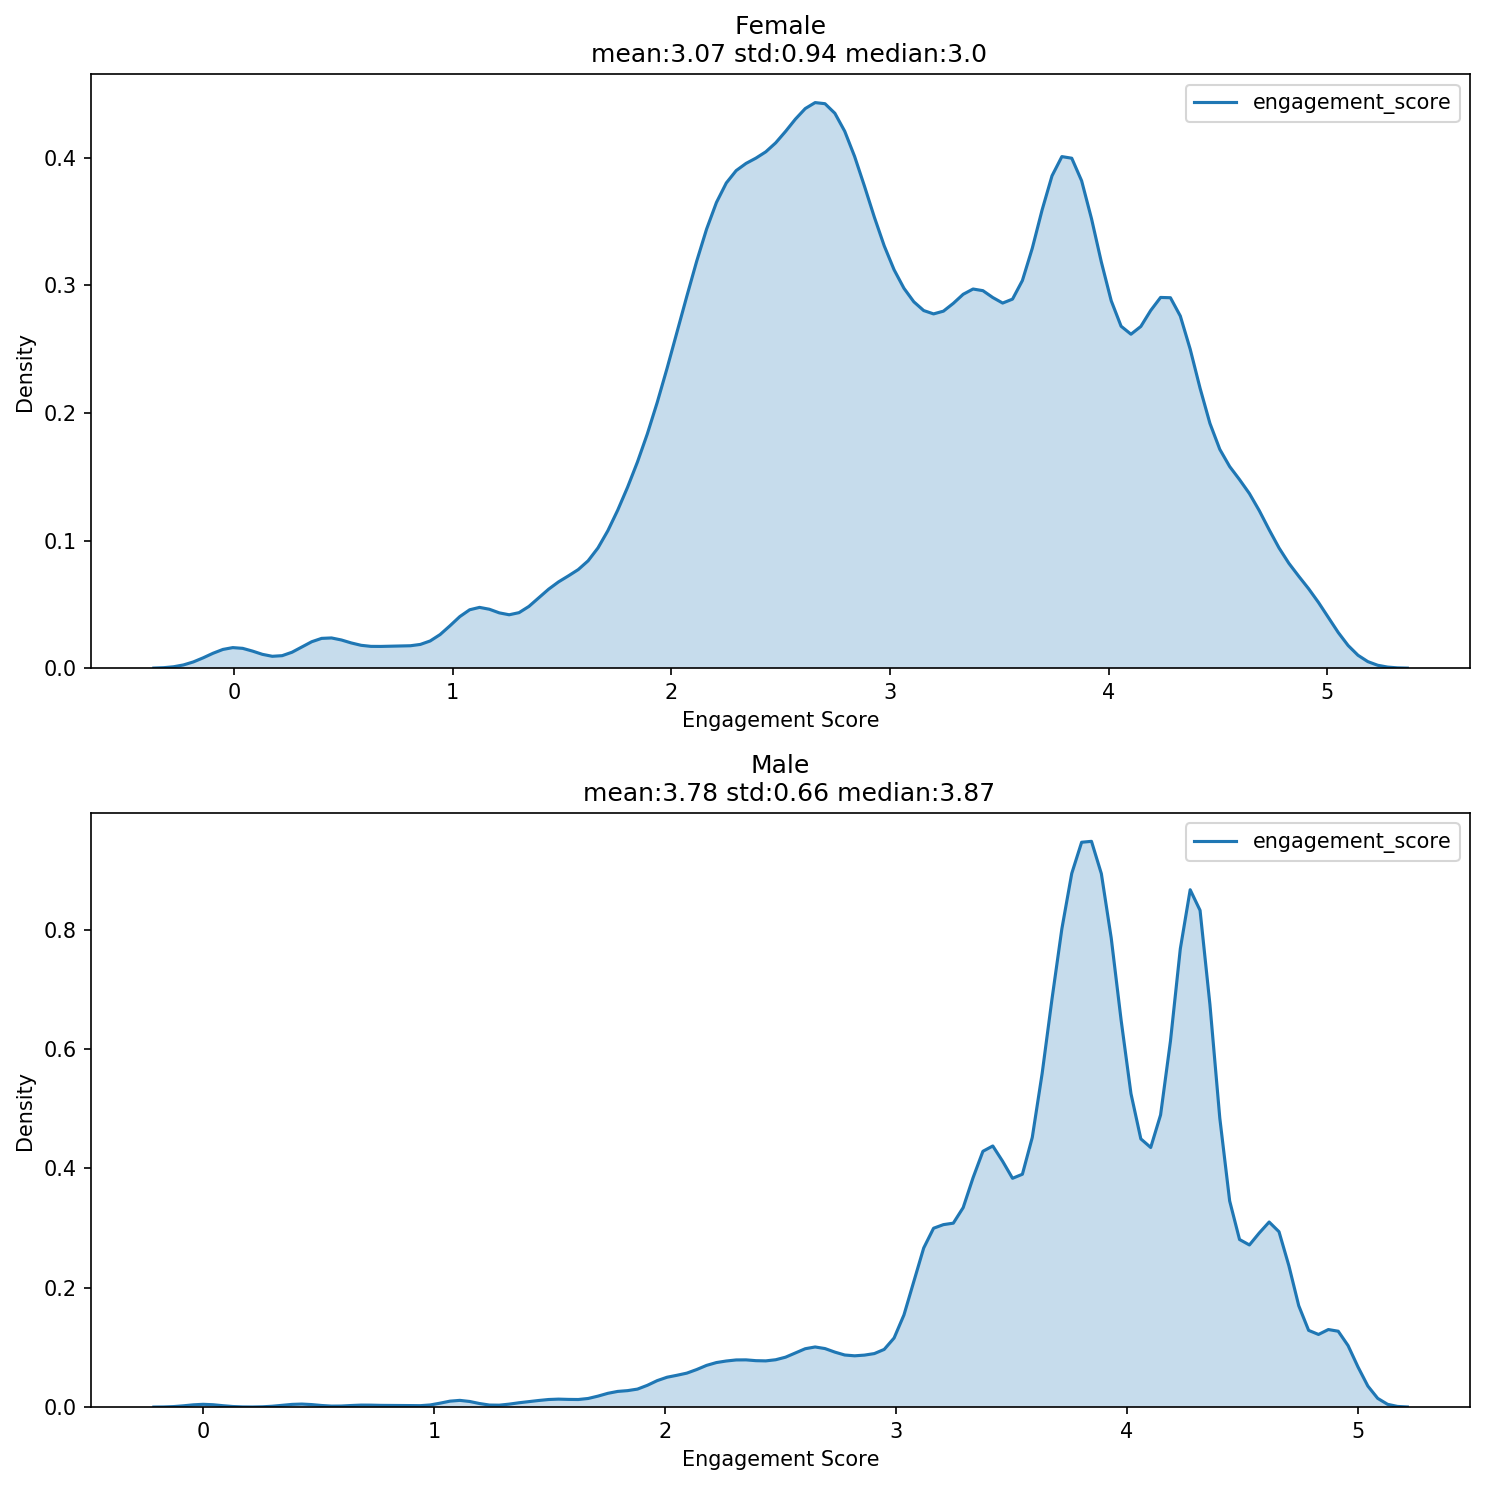

In [101]:
dist(train_1,'gender')

* Males tend to have higher engagement score than the females.

# Benchmark Model

 We take the mean of the train_1 model as the benchmark model

In [126]:
from sklearn.metrics import r2_score

In [117]:
train_1.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,age_category,engagement_score
0,19990,others,128,24,Male,Student,180,1000,adult,4.33
1,5304,32,132,14,Female,Student,330,714,child,1.79
2,1840,12,24,19,Male,Student,180,138,adult,4.35
3,12597,23,112,19,Male,Student,220,613,adult,3.77
4,13626,23,112,27,Male,Working Professional,220,613,adult,3.13


In [118]:
mean_1 = train_1['engagement_score'].mean()

In [119]:
mean_1

3.487797011110046

In [122]:
pred_target = pd.Series([mean_1]*len(train_1))

In [127]:
r2_score(target,pred_target)

0.0

In [128]:
ss['engagement_score'] = pd.Series([mean_1]*len(test_1))

In [130]:
ss.to_csv('benchmark_model.csv',index=False)

# Linear Regression

In [132]:
df_2 = pd.get_dummies(df_1,drop_first=True)

In [135]:
df_2.head()

,user_id,video_id,age,followers,views,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,...,category_id_39,category_id_42,category_id_43,category_id_others,gender_Male,profession_Student,profession_Working Professional,age_category_adult,age_category_mid_age,age_category_senior
0,19990,128,24,180,1000,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0
1,5304,132,14,330,714,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1840,24,19,180,138,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,12597,112,19,220,613,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,13626,112,27,220,613,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [136]:
train_2,test_2 = split_df(df_2)

In [137]:
train_2.shape,test_2.shape

((89197, 42), (11121, 41))

In [138]:
x = train_2.drop(['engagement_score'],axis=1)
y = train['engagement_score']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=98)

In [141]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression(normalize=True)

In [142]:
model_1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [143]:
pred_y = model_1.predict(x_val)

In [144]:
r2_score(y_val,pred_y)

0.30364293767272343

In [145]:
pred_target = model_1.predict(test_2)

In [146]:
ss['engagement_score'] = pred_target

In [147]:
ss.to_csv('Linear_reg.csv',index=False)

In [148]:
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(n_splits=5,test_size = 0.2,random_state=87)

In [149]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_1,x_train,y_train,cv=cv)

array([0.31563564, 0.30721416, 0.31128248, 0.32479593, 0.31567419])

# Ridge Regression

In [150]:
from sklearn.linear_model import Ridge

In [151]:
model_2 = Ridge()

In [158]:
alpha_ridge = {
    'alpha':[0.01,0.1,0.05,0.2]
}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=model_2,param_grid=alpha_ridge,cv=5)

In [159]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.05, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [160]:
gs.best_params_

{'alpha': 0.2}

In [161]:
model_2 = Ridge(alpha=0.2)
model_2.fit(x_train,y_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [162]:
pred_y = model_2.predict(x_val)

In [163]:
r2_score(y_val,pred_y)

0.30365598078023537

In [164]:
cross_val_score(model_2,x_train,y_train,cv=cv)

array([0.31563039, 0.30720779, 0.3112822 , 0.32479398, 0.31567516])

In [165]:
pred_target = model_2.predict(test_2)

In [166]:
ss['engagement_score'] = pred_target
ss.to_csv('Ridge.csv',index=False)

# Decision Tree

In [168]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [217]:
hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128]
}
model_3 = DecisionTreeRegressor()
rs = RandomizedSearchCV(estimator=DecisionTreeRegressor(),param_distributions=hyperparam_combs,random_state=58,n_iter=30)

In [218]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid

In [176]:
best_params = rs.best_params_

In [177]:
model_3 = DecisionTreeRegressor(**best_params)

In [178]:
cross_val_score(model_3,x_train,y_train,cv=cv)

array([0.32951981, 0.32746991, 0.33271547, 0.33530648, 0.32970064])

In [179]:
model_3.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=0.8, max_leaf_nodes=128,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=40,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [180]:
pred_y = model_3.predict(x_val)

In [181]:
r2_score(y_val,pred_y)

0.32519556340678923

In [182]:
pred_target = model_3.predict(test_2)

In [184]:
ss['engagement_score'] = pred_target
ss.to_csv('DT.csv',index=False)

# Random Forest

In [203]:
from sklearn.ensemble import RandomForestRegressor
model_4 = RandomForestRegressor(n_estimators=200)

In [204]:
rs = RandomizedSearchCV(estimator=model_4,param_distributions=hyperparam_combs,random_state=58,n_iter=20)

In [205]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=200,
                           

In [206]:
best_params=rs.best_params_

In [207]:
model_4 = RandomForestRegressor(**best_params)

In [208]:
model_4.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.8, max_leaf_nodes=128,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=40, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [209]:
pred_y = model_4.predict(x_val)

In [210]:
r2_score(y_val,pred_y)

0.3409021177844165

In [211]:
cross_val_score(model_4,x_train,y_train,cv=cv)

array([0.34041758, 0.3373754 , 0.34193003, 0.35129   , 0.34174936])

In [212]:
pred_target = model_4.predict(test_2)

In [213]:
ss['engagement_score'] = pred_target

In [214]:
ss.to_csv('RF.csv',index=False)

# XG_Boost

In [219]:
from xgboost import XGBRegressor
model_5 = XGBRegressor(n_estimators = 200)

In [447]:
hyperparam_combs = {
    'learning_rate':[0.2,0.1,0.05],
    'max_depth': [4, 6, 8, 10, 12],
    'subsample':[0.4,0.6,0.8],
    'colsample_bylevel': [ 0.4, 0.6, 0.8, 1],
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0.1,0.05,0.2],
    'reg_alpha':[0.1,0.05,0.2],
    'reg_lambda':[0.1,0.05,0.2]
}

In [448]:
rs = RandomizedSearchCV(estimator=model_5,param_distributions=hyperparam_combs,random_state=24,n_iter=20)

In [449]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.8,
                                          enable_categorical=False, gamma=0.1,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.2, max_delta_step=0,
                                          max_depth=6, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=...
                   param_distributions={'colsample_bylevel': [0.4, 0.6, 0.8, 1],
                                        'colsample_bytree': [0.4, 0.6, 0.8],
                                

In [451]:
best_params = rs.best_params_

In [373]:
model_5 = XGBRegressor(n_estimators =200,**best_params)

In [230]:
model_5.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0.05, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0.05, reg_lambda=0.2,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [231]:
pred_y = model_5.predict(x_val)

In [232]:
r2_score(y_val,pred_y)

0.3965946547448731

In [234]:
cross_val_score(model_5,x_train,y_train,cv=cv)

array([0.37893148, 0.38648366, 0.38074428, 0.38199437, 0.3800031 ])

In [235]:
pred_target = model_5.predict(test_2)

In [236]:
ss['engagement_score'] = pred_target
ss.to_csv('XGB.csv',index=False)

# Feature engineering

In [237]:
df_1.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,age_category
0,19990,others,128,24,Male,Student,180,1000,adult
1,5304,32,132,14,Female,Student,330,714,child
2,1840,12,24,19,Male,Student,180,138,adult
3,12597,23,112,19,Male,Student,220,613,adult
4,13626,23,112,27,Male,Working Professional,220,613,adult


In [259]:
g = df_1.user_id.value_counts()

In [260]:
g

9898     12
1448     11
13218    11
5198     11
20608    11
         ..
18566     2
3498      2
14472     2
10378     2
2047      2
Name: user_id, Length: 27734, dtype: int64

In [265]:
df_1['user_freq'] = df_1['user_id'].map(df_1['user_id'].value_counts())

In [266]:
df_1.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,age_category,user_freq
0,19990,others,128,24,Male,Student,180,1000,adult,3
1,5304,32,132,14,Female,Student,330,714,child,5
2,1840,12,24,19,Male,Student,180,138,adult,4
3,12597,23,112,19,Male,Student,220,613,adult,3
4,13626,23,112,27,Male,Working Professional,220,613,adult,4


Here we have created a new column called user_freq which shows the number of times the user_id appears in the dataset. Hence user_id column can be dropped.

In [268]:
df_1.drop(['user_id'],axis=1,inplace=True)

In [269]:
df_1['user_freq'] = df_1['user_freq'].astype('category')

In [271]:
df_1.dtypes

category_id       object
video_id           int64
age                int64
gender            object
profession        object
followers          int64
views              int64
age_category    category
user_freq       category
dtype: object

In [272]:
df_3 = pd.get_dummies(df_1,drop_first=True)

In [273]:
df_3.head()

,video_id,age,followers,views,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,...,user_freq_3,user_freq_4,user_freq_5,user_freq_6,user_freq_7,user_freq_8,user_freq_9,user_freq_10,user_freq_11,user_freq_12
0,128,24,180,1000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,132,14,330,714,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,19,180,138,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,112,19,220,613,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,112,27,220,613,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


We standardise the data to perform PCA.

In [274]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [276]:
df_4 = scalar.fit_transform(df_3)
df_4 = pd.DataFrame(df_4,columns=df_3.columns)

In [277]:
df_4.head()

,video_id,age,followers,views,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,...,user_freq_3,user_freq_4,user_freq_5,user_freq_6,user_freq_7,user_freq_8,user_freq_9,user_freq_10,user_freq_11,user_freq_12
0,1.032179,-0.094830,-1.591931,1.881624,-0.13688,-0.216687,-0.325172,-0.118924,-0.144219,-0.288092,...,1.485906,-0.508155,-0.438201,-0.336099,-0.24283,-0.1794,-0.108207,-0.06484,-0.027715,-0.010938
1,1.114655,-1.211491,1.717548,0.810355,-0.13688,-0.216687,-0.325172,-0.118924,-0.144219,-0.288092,...,-0.672990,-0.508155,2.282060,-0.336099,-0.24283,-0.1794,-0.108207,-0.06484,-0.027715,-0.010938
2,-1.112185,-0.653160,-1.591931,-1.347165,-0.13688,-0.216687,-0.325172,-0.118924,-0.144219,-0.288092,...,-0.672990,1.967904,-0.438201,-0.336099,-0.24283,-0.1794,-0.108207,-0.06484,-0.027715,-0.010938
3,0.702277,-0.653160,-0.709403,0.432040,-0.13688,-0.216687,-0.325172,-0.118924,-0.144219,-0.288092,...,1.485906,-0.508155,-0.438201,-0.336099,-0.24283,-0.1794,-0.108207,-0.06484,-0.027715,-0.010938
4,0.702277,0.240168,-0.709403,0.432040,-0.13688,-0.216687,-0.325172,-0.118924,-0.144219,-0.288092,...,-0.672990,1.967904,-0.438201,-0.336099,-0.24283,-0.1794,-0.108207,-0.06484,-0.027715,-0.010938


# PCA

In [279]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_4)

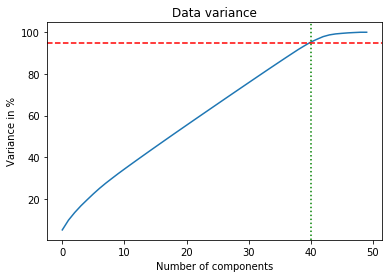

In [281]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('Variance in %')
plt.title('Data variance')
plt.axhline(y=95,color='r',linestyle= '--')
plt.axvline(x=40,color='g',linestyle=':')
plt.show()

In [282]:
pca = PCA(40).fit(df_4)
df_5 = pca.transform(df_4)


In [285]:
df_5 = pd.DataFrame(df_5)

In [286]:
df_5.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.848112,0.525125,-1.597096,2.269940,1.289343,0.682242,0.415614,0.202778,0.135691,-0.654379,...,0.014626,0.005907,-0.012600,0.084507,-0.010059,0.121175,-0.008036,0.160759,0.126305,0.165444
1,-1.551921,2.681992,1.996774,0.017984,0.390043,-1.306711,-0.007305,1.765401,0.420481,1.034066,...,0.055372,-0.062737,0.050978,-1.204517,-0.085707,-0.636532,-0.401544,-0.811473,-0.231256,0.062687
2,-1.410893,-2.680032,-1.326947,-0.297714,-0.620275,0.475451,-1.998225,-1.201020,0.034709,-0.788593,...,0.058115,-0.071867,0.123476,-0.245083,-0.159463,-0.235353,-0.187535,-0.543590,0.575921,-0.890540
3,-1.153336,0.176878,-1.681941,2.124450,0.256804,0.878051,0.616561,-0.322494,-0.032002,-0.872044,...,0.165571,-0.367864,-0.110157,-0.800612,0.096503,-0.322310,0.040279,-0.282049,0.477114,-0.780182
4,1.427991,-0.147047,-0.857409,0.576518,1.126303,1.031434,-1.500751,-1.330605,0.193960,-0.928632,...,0.177663,-0.331514,-0.125484,-0.696331,-0.149094,-0.462451,-0.018344,-0.552370,1.317024,-1.580552


In [287]:
train_f,test_f = split_df(df_5)

In [288]:
train_f.shape,test_f.shape

((89197, 41), (11121, 40))

In [289]:
x_f = train_f.drop(['engagement_score'],axis=1)
y_f = train_f['engagement_score']

# Linear regression

In [290]:
x_f_train,x_f_val,y_f_train,y_f_val = train_test_split(x_f,y_f,random_state=22,test_size=0.2)

In [291]:
model_1f = LinearRegression()
model_1f.fit(x_f_train,y_f_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
pred_y = model_1f.predict(x_f_val)

In [293]:
r2_score(y_f_val,pred_y)

0.2612021643407917

In [294]:
cv=ShuffleSplit(n_splits=5,test_size = 0.2,random_state=72)
cross_val_score(model_1f,x_f_train,y_f_train,cv=cv)

array([0.27415038, 0.27241261, 0.26201311, 0.26556429, 0.26156607])

In [295]:
pred_target_lin = model_1f.predict(test_f)

In [296]:
ss['engagement_score'] = pred_target_lin
ss.to_csv('LRF.csv',index=False)

# Ridge_f

In [297]:
model_2f = Ridge()

In [298]:
alpha_ridge = {
    'alpha':[0.01,0.1,0.05,0.2]
}

In [299]:
gs = GridSearchCV(estimator=model_2f,param_grid=alpha_ridge,cv=5)

In [300]:
gs.fit(x_f_train,y_f_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=0.2, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 0.05, 0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [301]:
gs.best_params_

{'alpha': 0.2}

In [302]:
model_2f = Ridge(alpha=0.2)

In [303]:
model_2f.fit(x_f_train,y_f_train)

Ridge(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [304]:
pred_y = model_2f.predict(x_f_val)

In [305]:
r2_score(y_f_val,pred_y)

0.2612021761057972

In [306]:
cross_val_score(model_2f,x_f_train,y_f_train,cv=cv)

array([0.27415038, 0.27241263, 0.26201313, 0.26556429, 0.26156609])

In [308]:
pred_target_rid = model_2f.predict(test_f)

In [310]:
ss['engagement_score'] = pred_target_rid
ss.to_csv('Rid_f.csv',index=False)

# Decision tree Feature

In [311]:
hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128]
}
model_3f = DecisionTreeRegressor()
rs = RandomizedSearchCV(estimator=DecisionTreeRegressor(),param_distributions=hyperparam_combs,random_state=34,n_iter=30)

In [312]:
rs.fit(x_f_train,y_f_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid

In [314]:
best_params = rs.best_params_

In [315]:
model_3f = DecisionTreeRegressor(**best_params)

In [316]:
model_3f.fit(x_f_train,y_f_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=0.8, max_leaf_nodes=128,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [317]:
pred_y = model_3f.predict(x_f_val)

In [318]:
r2_score(y_f_val,pred_y)

0.3124549406875836

In [319]:
cross_val_score(model_3f,x_f_train,y_f_train,cv=cv)

array([0.31894127, 0.3208201 , 0.30656385, 0.30573222, 0.31867017])

In [320]:
pred_target_DT = model_3f.predict(test_f)

In [338]:
ss['engagement_score'] = pred_target_DT
ss.to_csv('DTF.csv',index=False)

# Random Forest Feature

In [322]:
model_4f = RandomForestRegressor(n_estimators=200)

In [328]:
hyperparam_combs = {
    'ccp_alpha':[0.1,0.05,0.2],
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128]
}

In [329]:
rs = RandomizedSearchCV(estimator=model_4f,param_distributions=hyperparam_combs,random_state=104,n_iter=20)

In [330]:
rs.fit(x_f_train,y_f_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=200,
                           

In [332]:
best_params = rs.best_params_

In [333]:
model_4f = RandomForestRegressor(n_estimators=200,**best_params)

In [334]:
model_4f.fit(x_f_train,y_f_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.05, criterion='mse',
                      max_depth=12, max_features=0.8, max_leaf_nodes=16,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [335]:
pred_y = model_4f.predict(x_f_val)

In [336]:
r2_score(y_f_val,pred_y)

0.11111103231329555

In [337]:
cross_val_score(model_4f,x_f_train,y_f_train,cv=cv)

array([0.12568484, 0.12124778, 0.10363704, 0.11452908, 0.1144196 ])

# XGboost Feature

In [339]:
hyperparam_combs = {
    'learning_rate':[0.2,0.1,0.05],
    'max_depth': [4, 6, 8, 10, 12],
    'subsample':[0.4,0.6,0.8],
    'colsample_bylevel': [ 0.4, 0.6, 0.8, 1],
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0.1,0.05,0.2],
    'reg_alpha':[0.1,0.05,0.2],
    'reg_lambda':[0.1,0.05,0.2]
}

In [340]:
model_5f = XGBRegressor(n_estimators=200)

In [341]:
rs = RandomizedSearchCV(estimator=model_5f,param_distributions=hyperparam_combs,random_state=42,n_iter=20)

In [342]:
rs.fit(x_f_train,y_f_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          mo...
                   param_distributions={'colsample_bylevel': [0.4, 0.6, 0.8, 1],
                                        'colsample_bytree': [0.4, 0.6, 0.8],
                                

In [344]:
best_params = rs.best_params_

In [455]:
model_5f = XGBRegressor(n_estimators=200,base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0.05, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=1, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0.05, reg_lambda=0.2,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [456]:
model_5f.fit(x_f_train,y_f_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0.05, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0.05, reg_lambda=0.2,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [349]:
pred_y = model_5f.predict(x_f_val)

In [350]:
r2_score(y_f_val,pred_y)

0.3479833103071446

In [351]:
cross_val_score(model_5f,x_f_train,y_f_train,cv=cv)

array([0.35198223, 0.35221524, 0.33658662, 0.34226781, 0.34506443])

In [352]:
pred_target_XGB = model_5f.predict(test_f)

In [353]:
ss['engagement_score'] = pred_target_XGB
ss.to_csv('XGB_F.csv',index=False)

# Ensembling

From the models wetake only those models whose score is greater than 0.3. Then we combine the selected models and apply linear regression to find the final output.  

In [365]:
def enseble_pred(model,tr_x,ts_x,tr_y):
    model.fit(tr_x,tr_y)
    y_pred_ts = model.predict(ts_x)
    y_pred_tr = model.predict(tr_x)
    return y_pred_tr,y_pred_ts

In [366]:
lr_tr,lr_ts = enseble_pred(model_1,x,test_2,y)

In [368]:
lr_tr.shape,lr_ts.shape

((89197,), (11121,))

In [369]:
rg_tr,rg_ts = enseble_pred(model_2,x,test_2,y)

In [370]:
dt_tr,dt_ts = enseble_pred(model_3,x,test_2,y)

In [372]:
rf_tr,rf_ts = enseble_pred(model_4,x,test_2,y)

In [374]:
xgb_tr,xgb_ts = enseble_pred(model_5,x,test_2,y)

In [375]:
dtf_tr,dtf_ts = enseble_pred(model_3f,x_f,test_f,y)

In [376]:
xgbf_tr,xgbf_ts = enseble_pred(model_5f,x_f,test_f,y)

In [388]:
train_ensemble = pd.DataFrame([lr_tr,rg_tr,dt_tr,rf_tr,xgb_tr,dtf_tr,xgbf_tr])

In [389]:
train_ensemble

,0,1,2,3,4,5,6,7,8,9,...,89187,89188,89189,89190,89191,89192,89193,89194,89195,89196
0,3.751998,3.298213,4.056380,4.457021,3.804991,3.444694,4.105428,4.102452,4.370050,4.187221,...,3.353247,3.361969,3.908922,2.782648,3.103545,3.493700,3.390291,4.092158,3.782520,3.842730
1,3.751317,3.298222,4.056397,4.456986,3.804965,3.444701,4.105431,4.102450,4.370031,4.187196,...,3.353265,3.361980,3.908963,2.782683,3.102870,3.493741,3.390841,4.092154,3.782502,3.842738
2,4.330000,1.790000,4.350000,3.770000,3.130000,3.330000,3.800000,3.870000,2.880000,3.800000,...,3.650000,4.230000,4.440000,2.600000,3.190000,3.910000,3.560000,4.230000,3.770000,4.310000
3,3.953463,3.091532,4.047180,4.379833,3.779209,3.569479,3.983441,4.059416,4.177219,4.140312,...,3.405747,3.370050,4.019510,2.601781,3.304878,3.481079,3.539764,3.945623,3.515766,4.035293
4,3.913438,3.168304,4.055741,4.372058,3.676113,3.487221,4.048542,4.100013,4.296601,4.115278,...,3.484792,3.308493,3.979700,2.548204,3.351105,3.445801,3.517221,3.941332,3.655880,4.000759
5,3.869596,3.060747,4.138312,4.375985,3.924405,3.408771,3.736046,3.979832,4.186974,4.186974,...,3.665731,3.174944,3.949433,2.610376,3.318215,3.241388,3.403380,3.979832,3.737379,3.932930
6,3.932856,3.307662,4.126827,4.372944,3.725835,3.519036,3.995414,4.078914,4.263110,4.054349,...,3.633349,3.359102,3.977508,2.470341,3.294439,3.323498,3.552523,3.906021,3.747190,3.905408


In [390]:
train_ensemble = train_ensemble.T
train_ensemble

,0,1,2,3,4,5,6
0,3.751998,3.751317,4.33,3.953463,3.913438,3.869596,3.932856
1,3.298213,3.298222,1.79,3.091532,3.168304,3.060747,3.307662
2,4.056380,4.056397,4.35,4.047180,4.055741,4.138312,4.126827
3,4.457021,4.456986,3.77,4.379833,4.372058,4.375985,4.372944
4,3.804991,3.804965,3.13,3.779209,3.676113,3.924405,3.725835
...,...,...,...,...,...,...,...
89192,3.493700,3.493741,3.91,3.481079,3.445801,3.241388,3.323498
89193,3.390291,3.390841,3.56,3.539764,3.517221,3.403380,3.552523
89194,4.092158,4.092154,4.23,3.945623,3.941332,3.979832,3.906021
89195,3.782520,3.782502,3.77,3.515766,3.655880,3.737379,3.747190


In [392]:
test_ensemble = pd.DataFrame([lr_ts,rg_ts,dt_ts,rf_ts,xgb_ts,dtf_ts,xgbf_ts])
test_ensemble = test_ensemble.T
test_ensemble

,0,1,2,3,4,5,6
0,4.040444,4.040461,2.96,4.043717,4.086848,4.092590,4.119846
1,3.461876,3.461915,3.62,3.725914,3.621824,3.764158,3.437112
2,2.788112,2.788100,3.67,2.712488,2.737353,3.241388,2.879521
3,4.073964,4.073955,4.62,3.925130,3.849050,3.869596,3.654812
4,2.388241,2.388275,1.10,2.172556,2.230755,2.119554,2.125738
...,...,...,...,...,...,...,...
11116,3.857471,3.857474,1.50,4.017437,3.933839,3.932930,3.968783
11117,3.437681,3.437669,2.80,3.475885,3.427231,3.441838,3.376260
11118,4.092708,4.092705,2.80,3.922200,3.960799,3.634689,3.915714
11119,3.711545,3.711569,3.83,3.808608,3.795090,3.633833,3.755215


In [396]:
model_1.fit(train_ensemble,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [398]:
y_pred = model_1.predict(test_ensemble)

In [399]:
ss['engagement_score'] = y_pred
ss.to_csv('Ensemble_LR.csv',index=False)

In [400]:
hyperparam_combs = {
    'learning_rate':[0.2,0.1,0.05],
    'max_depth': [4, 6, 8, 10, 12],
    'subsample':[0.4,0.6,0.8],
    'colsample_bylevel': [ 0.4, 0.6, 0.8, 1],
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0.1,0.05,0.2],
    'reg_alpha':[0.1,0.05,0.2],
    'reg_lambda':[0.1,0.05,0.2]
}

In [401]:
rs = RandomizedSearchCV(estimator=model_5,param_distributions=hyperparam_combs,random_state=22,n_iter=20)

In [402]:
rs.fit(train_ensemble,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=0.6,
                                          colsample_bynode=1,
                                          colsample_bytree=0.6,
                                          enable_categorical=False, gamma=0.05,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.05, max_delta_step=0,
                                          max_depth=6, min_child_weight=1,
                                          missing=nan,
                                          monotone_constrai...
                   param_distributions={'colsample_bylevel': [0.4, 0.6, 0.8, 1],
                                        'colsample_bytree': [0.4, 0.6, 0.8],
                                

In [405]:
best_params = rs.best_params_

In [406]:
model_5 = XGBRegressor(n_estimators=200,**best_params)

In [407]:
model_5.fit(train_ensemble,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0.05, reg_lambda=0.05,
             scale_pos_weight=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [408]:
y_pred = model_5.predict(test_ensemble)

In [409]:
y_pred

array([2.9446838, 3.5707614, 3.611782 , ..., 2.7905624, 3.8061442,
       3.1839745], dtype=float32)

In [410]:
ss['engagement_score'] = y_pred

In [411]:
ss.to_csv('XGB_ensemble.csv',index=False)

In [414]:
df_1

,category_id,video_id,age,gender,profession,followers,views,age_category,user_freq
0,others,128,24,Male,Student,180,1000,adult,3
1,32,132,14,Female,Student,330,714,child,5
2,12,24,19,Male,Student,180,138,adult,4
3,23,112,19,Male,Student,220,613,adult,3
4,23,112,27,Male,Working Professional,220,613,adult,4
...,...,...,...,...,...,...,...,...,...
100313,25,140,21,Male,Student,240,317,adult,4
100314,8,100,19,Female,Student,280,628,adult,4
100315,16,98,22,Male,Student,270,462,adult,7
100316,8,16,33,Male,Other,280,628,adult,4


In [417]:
df_1.user_freq = df_1.user_freq.astype('int64')

In [419]:
df_2 = pd.get_dummies(df_1,drop_first=True)

In [420]:
df_2.head()

,video_id,age,followers,views,user_freq,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,...,category_id_39,category_id_42,category_id_43,category_id_others,gender_Male,profession_Student,profession_Working Professional,age_category_adult,age_category_mid_age,age_category_senior
0,128,24,180,1000,3,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0
1,132,14,330,714,5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,24,19,180,138,4,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,112,19,220,613,3,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,112,27,220,613,4,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [421]:
train_new,test_new = split_df(df_2)

In [423]:
x_new = train_new.drop(['engagement_score'],axis=1)


In [425]:
x_train_new,x_val_new,y_train,y_val_new = train_test_split(x_new,y,random_state=56,test_size=0.2)

In [426]:
model_1.fit(x_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [427]:
pred_y = model_1.predict(x_val_new)

In [428]:
r2_score(y_val_new,pred_y)

0.31509443412473326

In [429]:
cross_val_score(model_1,x_train_new,y_train,cv=cv)

array([0.31604516, 0.31890042, 0.30966496, 0.31645806, 0.32219591])

In [430]:
pred_target = model_1.predict(test_new)

In [431]:
ss['engagement_score'] = pred_target
ss.to_csv('LinReg_new.csv',index=False)

In [458]:
model_5 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0.05, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=1,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0.05, reg_lambda=0.2,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [459]:
model_5.fit(x_train_new,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0.05, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0.05, reg_lambda=0.2,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [460]:
pred_y = model_5.predict(x_val_new)

In [461]:
r2_score(y_val_new,pred_y)

0.29845912529827867

In [462]:
cross_val_score(model_5,x_train_new,y_train,cv=cv)

array([0.26727451, 0.27820763, 0.26082658, 0.27389491, 0.28692984])

In [463]:
pred_target = model_5.predict(test_new)

In [464]:
ss['engagement_score'] = pred_target
ss.to_csv('XGB_new.csv',index=False)

In [465]:
xgbn_tr,xgbn_ts = enseble_pred(model_5,x_new,test_new,y)

In [466]:
new_ensemb_train = pd.DataFrame([xgb_tr,xgbn_tr])
new_ensemb_train = new_ensemb_train.T

In [467]:
new_ensemb_test = pd.DataFrame([xgb_ts,xgbn_ts])
new_ensemb_test = new_ensemb_test.T

In [468]:
model_1.fit(new_ensemb_train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [469]:
pred_target = model_1.predict(new_ensemb_test)

In [470]:
ss['engagement_score'] = pred_target
ss.to_csv('XGB_combined.csv',index=False)